### MA3402 Estadística
## Tarea 1, Entrega 1: Conociendo R usando la LGN y el TCL.

**Profesor:** Joaquín Fontbona T.

**Auxiliares:** Javier Maass, Francisco Muñoz y Diego Olguín.

## ¿Qué es R?
R es un lenguaje de programación específicamente diseñado para realizar análisis estadísticos y producir gráficos pertinentes. En particular, permite la manipulación y análisis de datos, cálculos matriciales, el uso de métodos estadísticos clásicos y avanzados, así como representaciones gráficas (histogramas, gráficos de caja, entre otros). También es un lenguaje de programación eficiente y fácil de usar. Tiene funciones predefinidas y permite crear funciones propias. R es un software libre, lo que significa que los usuarios tienen la libertad de ejecutar, copiar, distribuir, estudiar y mejorar el software. R está disponible para los sistemas operativos Unix, Linux, Windows y MacOSX en el sitio CRAN http://www.r-project.org/. Hay muchos tutoriales disponibles en línea, como **_R pour les débutants_ de E. Paradis, _An introduction to R_ de  W.N. Venables, D.M. Smith; o incluso el repositorio [_GitHub CC6104 Pensamiento Estadístico_](https://github.com/dccuchile/CC6104) de Felipe Bravo**.

## Antes de comenzar
Mirar la playlist de _Introducción a R para estadística_ que hemos dejado disponible en UCursos (https://www.youtube.com/playlist?list=PLcnkc7YRWgxbB_SIm3efkoRIRyxP0N-IK).

## Manipulación de Vectores

Comencemos con cierta manipulación básica de los objetos de R:

Construya los siguientes vectores (utilizando el método más adecuado, a su juicio):
- $V_1 = (-1, 3.2, -2, 8)$
- $V_2 = (-2, -1, 0, 1, 2, 3, 4, 5, 6)$
- $V_3 = (0.05, 0.1, 0.15, 0.2)$
- $V_4 = (1, 1, 1, 1, 1, 1, 1, 1, 1, 1)$
- $V_5 = (\text{SÍ}, \text{NO})$

Ahora:
- Ordene el vector $V_1$.
- Defina $V_6 = 2 \cdot V_2 - 3$ y calcule $V_3 + V_2$ ¿Qué puede concluir sobre las operaciones aritméticas con vectores? 
- Calcule el logaritmo de las coordenadas de $V_3$. 
- ¿Cuál es el resultado de $V_5 + 1$?
- Acceda al segundo componente de $V_5$. 
- Muestre la longitud de $V_6$. 
- Cree el vector $V_7$ formado por los 3 últimos componentes de $V_6$.
- Calcule la suma de los coeficientes de $V_6$.

## Simulando Variables (Pseudo-)Aleatorias y graficando su distribución (empírica)
En esta sección, buscaremos que aprendan a simular muestras aleatorias de distintos tipos (conocidos) de v.a. Esto servirá como un primer paso antes de que comiencen a trabajar con datos propiamente tal.

Simule $N = 10000$ muestras de las siguientes variables aleatorias:
- $\texttt{normales0} \sim \mathcal{N}(0,1)$
- $\texttt{normales1} \sim \mathcal{N}(1,16)$
- $\texttt{uniformes} \sim \mathcal{U}([0,1])$
- $\texttt{poissons} \sim \mathrm{Poisson}(5)$
- $\texttt{exponenciales} \sim \mathrm{Exp}(1)$

Cree un data.frame $\texttt{vas}$ que contenga todas estas simulaciones, con una columna por cada una de las v.a.s de interés (i.e. deberá terminar con un data.frame de 10000 filas y 5 columnas).

### Graficando con ggplot2

In [ ]:
# Instalémosla en caso de que no la tengamos
if(!(require(ggplot2))){install.packages('ggplot2')}
library(ggplot2) 

Loading required package: ggplot2



Para simplificarles la vida, aquí les dejamos una función con la cual podrán plottear los histogramas de las distintas columnas de su data.frame sin mayores problemas (si quieren _pichicatearla_, pueden encontrar más información en el siguiente link: http://www.sthda.com/english/wiki/ggplot2-histogram-plot-quick-start-guide-r-software-and-data-visualization)

In [ ]:
# Función para plotear 
my.hist <- function(df, col, binwidth=0.1, xmin=-4, xmax=4){
    p <- ggplot(df, aes(x=!! sym(col))) + 
    geom_histogram(aes(y=after_stat(density)), colour="black", fill="white", binwidth = binwidth) +
    geom_density(alpha=.2, fill="#FF6666") + 
    geom_vline(aes(xintercept=mean(!!sym(col))), color="green", linetype="dashed", linewidth=1) + 
    labs(
        title='Histograma de la distribución',
        x = "Valor",
        y = "Frecuencia"
    ) + 
    theme(plot.title = element_text(h=0.5, face = "bold.italic")) + 
    coord_cartesian(xlim = c(xmin, xmax))
    return(p);
}


Podemos plotear las muestras que obtuvimos para las v.a.s y ver _cómo se distribuyen_ en el espacio en que viven.

In [ ]:
# Aquí, vas es el data.frame con las v.a.s y norms0 es el nombre de la columna con la v.a. normal estándar
p<-my.hist(vas,'norms0', binwidth=0.1)
p

ERROR: Error in ggplot(df, aes(x = !!sym(col))): object 'vas' not found


Para algunas de estas v.a.s _conocidas_ podemos incluso incluir su función de _densidad_ en el gráfico,para comparar la _distribución empírica_ con la teórica.

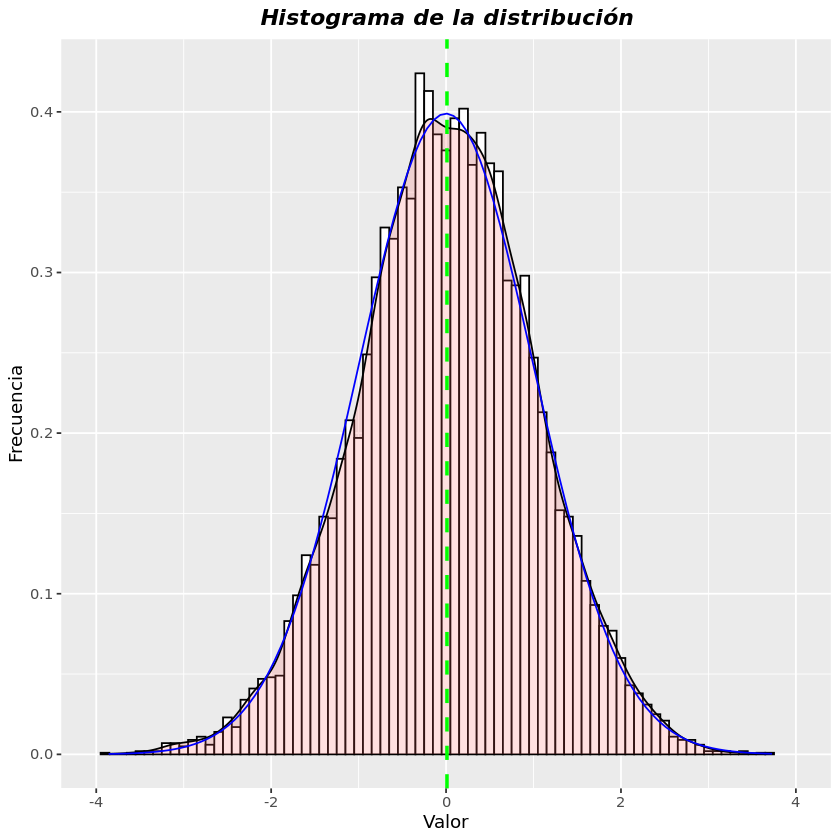

In [ ]:
# En este caso, dnorm es una función de R que tiene la densidad de la distribución normal.
p + stat_function(fun = dnorm, color = "blue")

Repita el procedimiento anterior, para obtener el histograma (con densidad) de al menos 3 de las v.a.s que simuló anteriormente.

Ya tenemos un data.frame con $N = 10000$ muestras de distintos tipos de v.a.s. En las siguientes secciones mostraremos empíricamente ciertos resultados universales de la teoría de probabilidades.

## Ilustrando la Ley de los Grandes Números (LGN)

A partir del data.frame $\texttt{vas}$, utilice la función $\texttt{cumsum}$ para generar un nuevo data.frame (llamado $\texttt{r.avg}$), en el cual, para cada fila $n$ se guarde el valor $\frac{1}{n}\sum_{k=1}^n X_k$ (donde $X$ es la v.a. asociada a la columna). Si lo estima necesario, utilice el método $\texttt{help}$ para saber más sobre la función $\texttt{cumsum}$. 

Ocupe la siguiente función para graficar la evolución de los promedios empíricos a medida que $N$ aumenta para al menos 3 de las v.a.s. anteriormente consideradas. En particular, calcule explícitamente la esperanza de dichas v.a.s, y comente sobre lo que observa en el gráfico. ¿Obtiene el resultado que esperaba? Si no es así, ¿qué podría cambiar para tratar de acercarse más al resultado esperado? 

In [ ]:
# Función para plotear 
my.cvg <- function(df, col, prom=0, ymin=0, ymax=1){
    pp <- ggplot(data=df, aes(x= as.numeric(row.names(df)), y=!!sym(col))) +
    geom_line() +
    geom_point() + 
    labs(
        title='Evolución del promedio Empírico en Función del Número de Muestras',
        x = "N° de Muestras",
        y = "Valor"
    ) +
    geom_hline(yintercept=prom, color="red") + 
    coord_cartesian(ylim = c(ymin, ymax))
    return(pp);
}

In [ ]:
# Aquí r.avg es el data.frame definido anteriormente y norms0 es el nombre de la columna asociada a las normales estándar.
# prom es el valor teórico de la esperanza de la v.a. en cuestión, en este caso es 0 para la normal estándar
my.cvg(r.avg, 'norms0', prom=0, ymin=-1, ymax=1) 

## Ilustrando el Teorema Central del Límite (TCL)

Ahora, para poder estudiar el TCL, necesitamos entender la _distribución_ (i.e. la _ley_) de la v.a. $\frac{1}{n}\sum_{k=1}^n X_k$. Es decir, debemos ser capaces de _simular_ varias realizaciones de esta v.a. (tal como lo hicimos antes) para visualizar _cómo se distribuyen estas realizaciones_ en el espacio.

Para fijar ideas, consideremos una v.a. $\texttt{dado}\sim \mathrm{Unif}(\{1, \dots, 6\})$, que representa el valor que toma un dado _balanceado_. Consideraremos $N = 10000$ realizaciones de la v.a. $\overline{\texttt{dado}}_n = \frac{1}{n}\sum_{k=1}^n \texttt{dado}_k$, donde $n =1000$ es un número de muestras i.i.d. $(\texttt{dado}_k)_{k=1}^n$, que nos permite _estimar_ el promedio de $\texttt{dado}$.

Simule lo anterior de la forma que estime conveniente, y guarde sus resultados en un data.frame llamado $\texttt{promedios}$ que guardará las $N=10000$ realizaciones i.i.d. de la v.a. $\overline{\texttt{dado}}_n$. Es decir, terminará con un data.frame de 10000 filas y 1 única columna, donde cada fila corresponde a una _aproximación del promedio de $\texttt{dado}$_ con $n=1000$ muestras.

Grafique el histograma para estas realizaciones de la v.a. $\overline{\texttt{dado}}_n$ (puede utilizar las funciones definidas en las partes anteriores). ¿Qué puede decir al respecto? ¿De qué manera se observa lo descrito por la LGN (que revisamos en la sección anterior)?

Estandarice y normalice, adecuadamente, las realizaciones de esta variable aleatoria (utilizando alguna función conveniente de R) y guarde sus resultados en un data.frame, tal como antes.

Grafique el histograma de la distribución de las muestras _normalizadas_ de la v.a. $\overline{\texttt{dado}}_n$. Comente lo que observa en el gráfico resultante. ¿Hay algún resultado conocido que permita explicar este fenómeno? ¿Por qué fue necesario hacer histogramas para observarlo, y no bastaban las herramientas de la sección anterior?

Repita el procedimiento anterior, con al menos 3 de las v.a's consideradas en la sección anterior, y adémas cambiando $n$ (considere valores $<< 1000$ y otros $>>1000$) y el ancho de los *bins* del histograma. Para cada una de las v.a's consideradas entregue 3 histogramas que ilustren correctamente el resultado esperado.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6f986ec-9e66-400a-833c-32ff350ef670' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>